<a href="https://colab.research.google.com/github/nayeem01/transaction-fraud-detection/blob/main/notebook/stacking3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
Mounted at /gdrive
/gdrive


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import NearMiss
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_learning_curves

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
file = r'/gdrive/My Drive/Colab Notebooks/sorted_data10k.csv'
df = pd.read_csv(file)

X=df[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig','oldbalanceDest','newbalanceDest']]
y=df['isFraud']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

nr = NearMiss()
X_train, y_train = nr.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


4 layer and neural network

In [ ]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier
import numpy as np
import warnings

warnings.simplefilter('ignore')

clf1 = KNeighborsClassifier(algorithm='auto', leaf_size=5, metric='minkowski',
                      metric_params=None, n_jobs=1, n_neighbors=50, p=2,
                      weights='uniform')
clf2 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=2,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=2, verbose=0,
            warm_start=False)
clf3 = GaussianNB()

clf4 = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)

lr = LogisticRegression()

sclf = StackingClassifier(classifiers=[clf1, clf2, clf3,clf4], 
                          meta_classifier=lr)

print('4-fold cross validation:\n')

for clf, label in zip([clf1, clf2, clf3,clf4, sclf], 
                      ['KNN', 
                       'Random Forest', 
                       'Naive Bayes',
                       'NN',
                       'StackingClassifier']):

    scores = model_selection.cross_val_score(clf, X_train, y_train, 
                                              cv=4, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

4-fold cross validation:

Accuracy: 0.94 (+/- 0.01) [KNN]
Accuracy: 0.92 (+/- 0.01) [Random Forest]
Accuracy: 0.93 (+/- 0.02) [Naive Bayes]
Accuracy: 0.92 (+/- 0.02) [NN]
Accuracy: 0.94 (+/- 0.01) [StackingClassifier]


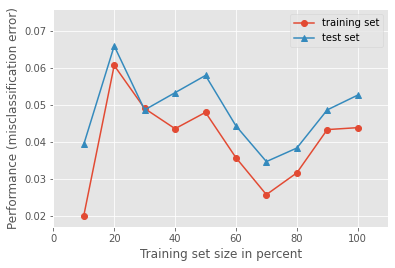

In [ ]:

#plot learning curves
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
plt.figure()
plot_learning_curves(X_train, y_train, X_test, y_test, sclf, print_model=False, style='ggplot')
plt.show()

meta xgboost

In [ ]:
from sklearn.svm import SVR
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier
import numpy as np
import warnings
from xgboost import XGBClassifier

warnings.simplefilter('ignore')

clf1 = KNeighborsClassifier(algorithm='auto', leaf_size=5, metric='minkowski',
                      metric_params=None, n_jobs=1, n_neighbors=50, p=2,
                      weights='uniform')
clf2 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=2,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=2, verbose=0,
            warm_start=False)
clf3 = GaussianNB()

clf4 = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)

xg = XGBClassifier(random_state=2, n_jobs=-1, learning_rate=0.1, 
                      n_estimators=1, max_depth=5)

sclf = StackingClassifier(classifiers=[clf1, clf2, clf3,clf4], 
                          meta_classifier=xg)

print('4-fold cross validation:\n')

for clf, label in zip([clf1, clf2, clf3,clf4, sclf], 
                      ['KNN', 
                       'Random Forest', 
                       'Naive Bayes',
                       'NN',
                       'StackingClassifier']):

    scores = model_selection.cross_val_score(clf, X_train, y_train, 
                                              cv=4, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

4-fold cross validation:

Accuracy: 0.95 (+/- 0.00) [KNN]
Accuracy: 0.91 (+/- 0.00) [Random Forest]
Accuracy: 0.90 (+/- 0.01) [Naive Bayes]
Accuracy: 0.96 (+/- 0.01) [NN]
Accuracy: 0.96 (+/- 0.01) [StackingClassifier]


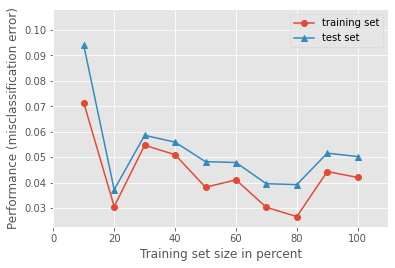

In [ ]:
#plot learning curves
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
plt.figure()
plot_learning_curves(X_train, y_train, X_test, y_test, sclf, print_model=False, style='ggplot')
plt.show()

clf= gaussin kernel svm 

In [ ]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier
import numpy as np
import warnings
from sklearn.svm import SVC


warnings.simplefilter('ignore')

clf1 = KNeighborsClassifier(algorithm='auto', leaf_size=5, metric='minkowski',
                      metric_params=None, n_jobs=1, n_neighbors=50, p=2,
                      weights='uniform')
clf2 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=2,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=2, verbose=0,
            warm_start=False)

clf3 = SVC(kernel='rbf')

clf4 = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)

rg =  LogisticRegression()

sclf = StackingClassifier(classifiers=[clf1, clf2, clf3,clf4], 
                          meta_classifier=rg)

print('4-fold cross validation:\n')

for clf, label in zip([clf1, clf2, clf3,clf4, sclf], 
                      ['KNN', 
                       'Random Forest', 
                       'svc',
                       'NN',
                       'StackingClassifier']):

    scores = model_selection.cross_val_score(clf, X_train, y_train, 
                                              cv=4, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

4-fold cross validation:

Accuracy: 0.95 (+/- 0.00) [KNN]
Accuracy: 0.91 (+/- 0.00) [Random Forest]
Accuracy: 0.94 (+/- 0.00) [svc]
Accuracy: 0.97 (+/- 0.01) [NN]
Accuracy: 0.96 (+/- 0.01) [StackingClassifier]


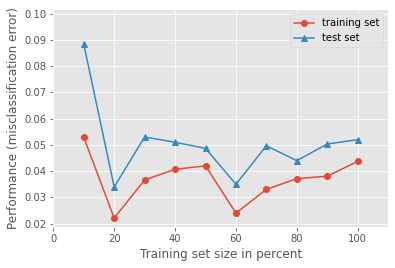

In [ ]:
#plot learning curves
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
plt.figure()
plot_learning_curves(X_train, y_train, X_test, y_test, sclf, print_model=False, style='ggplot')
plt.show()

grid search

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from mlxtend.classifier import StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

# Initializing models

clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = MLPClassifier(hidden_layer_sizes=(10,10,10), activation='relu', solver='adam', max_iter=500)
clf3 = SVC(kernel='rbf')
clf4 = RandomForestClassifier(random_state=1, max_depth=7, max_leaf_nodes=4) 
lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3,clf4], 
                          meta_classifier=lr)

params = {'kneighborsclassifier__n_neighbors': [1, 5],
          'randomforestclassifier__n_estimators': [10, 50],
          'meta_classifier__C': [0.1, 10.0]}

grid = GridSearchCV(estimator=sclf, 
                    param_grid=params, 
                    cv=5,
                    refit=True)
grid.fit(X_train, y_train)

cv_keys = ('mean_test_score', 'std_test_score', 'params')

for r, _ in enumerate(grid.cv_results_['mean_test_score']):
    print("%0.3f +/- %0.2f %r"
          % (grid.cv_results_[cv_keys[0]][r],
             grid.cv_results_[cv_keys[1]][r] / 2.0,
             grid.cv_results_[cv_keys[2]][r]))

print('Best parameters: %s' % grid.best_params_)
print('Accuracy: %.2f' % grid.best_score_)

0.967 +/- 0.00 {'kneighborsclassifier__n_neighbors': 1, 'meta_classifier__C': 0.1, 'randomforestclassifier__n_estimators': 10}
0.964 +/- 0.00 {'kneighborsclassifier__n_neighbors': 1, 'meta_classifier__C': 0.1, 'randomforestclassifier__n_estimators': 50}
0.964 +/- 0.00 {'kneighborsclassifier__n_neighbors': 1, 'meta_classifier__C': 10.0, 'randomforestclassifier__n_estimators': 10}
0.964 +/- 0.00 {'kneighborsclassifier__n_neighbors': 1, 'meta_classifier__C': 10.0, 'randomforestclassifier__n_estimators': 50}
0.973 +/- 0.00 {'kneighborsclassifier__n_neighbors': 5, 'meta_classifier__C': 0.1, 'randomforestclassifier__n_estimators': 10}
0.973 +/- 0.00 {'kneighborsclassifier__n_neighbors': 5, 'meta_classifier__C': 0.1, 'randomforestclassifier__n_estimators': 50}
0.981 +/- 0.00 {'kneighborsclassifier__n_neighbors': 5, 'meta_classifier__C': 10.0, 'randomforestclassifier__n_estimators': 10}
0.976 +/- 0.00 {'kneighborsclassifier__n_neighbors': 5, 'meta_classifier__C': 10.0, 'randomforestclassifier_

plot

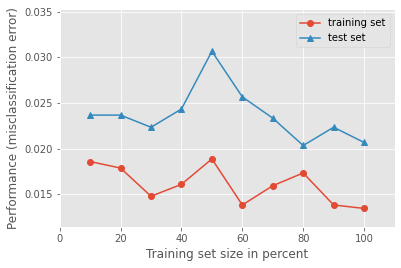

In [ ]:
#plot learning curves
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
plt.figure()
plot_learning_curves(X_train, y_train, X_test, y_test, grid, print_model=False, style='ggplot')
plt.show()